In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

$y = 0.5X^2 + X + 2 +$Gaussian Noise

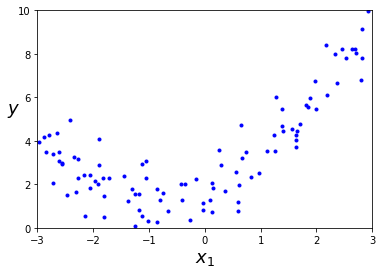

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

def plot_data():
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([-3, 3, 0, 10])
plot_data()

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
y_new = lin_reg.predict(X_new)

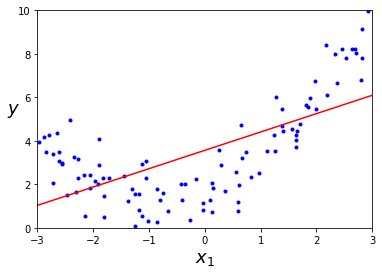

In [5]:
plot_data()
plt.plot(X_new, y_new, 'r')

# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=100, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_poly_scaled = std_scaler.fit_transform(X_poly)

In [8]:
lin_reg_poly_scaled = LinearRegression()
lin_reg_poly_scaled.fit(X_poly_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X_new_poly = poly_features.transform(X_new)
X_new_poly_scaled = std_scaler.transform(X_new_poly)
y_new_poly_scaled_pred = lin_reg_poly_scaled.predict(X_new_poly_scaled)

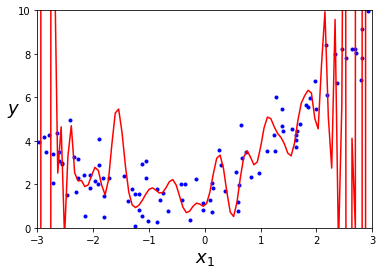

In [10]:
plot_data()
plt.plot(X_new, y_new_poly_scaled_pred, 'r')

# Polynomial Regression with Pipeline

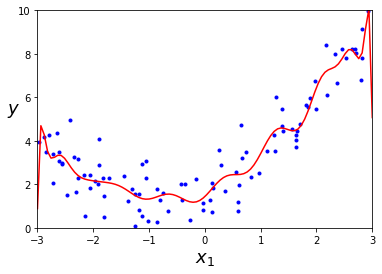

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=20, include_bias=False)
scaler = StandardScaler()
model = LinearRegression()

polynomial_regression = Pipeline([
    ("poly_features",  poly_features),
    ("std_scaler", scaler),
    ("model", model),
])
polynomial_regression.fit(X, y)

y_new = polynomial_regression.predict(X_new)

plot_data()
plt.plot(X_new, y_new, 'r')

# Regularization

array([[ 1.6666556 ,  1.66972022, -0.15263571, -0.0734534 ,  0.64184285,
         0.29500643,  0.38234634,  0.12517717, -0.28120113, -0.26061825,
        -0.73034934, -0.51380526, -0.76708343, -0.50737959, -0.41331591,
        -0.2421398 ,  0.24207041,  0.23010655,  1.10801478,  0.84465473]])

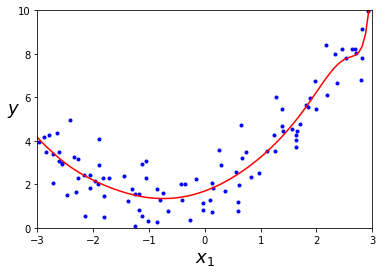

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(degree=20, include_bias=False)
scaler = StandardScaler()
# model = LinearRegression()

alpha = 0.1
max_iter=100
model = Ridge(max_iter=max_iter, alpha=alpha)
# model = Lasso(max_iter=max_iter, alpha=alpha)
# model = ElasticNet(max_iter=max_iter, alpha=alpha, l1_ratio=0.5, random_state=42)


polynomial_regression = Pipeline([
    ("poly_features",  poly_features),
    ("std_scaler", scaler),
    ("model", model),
])
polynomial_regression.fit(X, y)

y_new = polynomial_regression.predict(X_new)

plot_data()
plt.plot(X_new, y_new, 'r')

model.coef_

# Evaluate Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

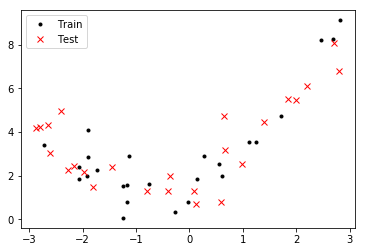

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50], test_size=0.5, random_state=10)
def plot_tran_test_data():
    plt.plot(X_train, y_train,'k.')
    plt.plot(X_val, y_val,'rx')
    plt.legend(['Train', 'Test'])
plot_tran_test_data()

In [15]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [16]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(n_iter =1,
                   penalty=None,                       
                   eta0=0.0005,
                   warm_start=True,
                   learning_rate="constant",
                   random_state=42)

sgd_reg = SGDRegressor(n_iter =1,
                       penalty='l1',
                       alpha=0.02,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

In [17]:
from copy import deepcopy

n_epochs = 1000
train_errors, train_errors_reg, val_errors, val_errors_reg = [], [], [], []
minimum_val_error = float("inf") 
minimum_val_error_reg = float("inf")
for epoch in range(n_epochs):
    sgd.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd.predict(X_train_poly_scaled)    
    y_val_predict = sgd.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))    
    val_error = mean_squared_error(y_val_predict, y_val)

    if val_error < minimum_val_error:
        minimum_val_error = val_error 
        best_model = deepcopy(sgd)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])     
        
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict_reg = sgd_reg.predict(X_train_poly_scaled)    
    y_val_predict_reg = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors_reg.append(mean_squared_error(y_train_predict_reg, y_train))
    val_errors_reg.append(mean_squared_error(y_val_predict_reg, y_val))    
    val_error_reg = mean_squared_error(y_val_predict_reg, y_val)

    if val_error_reg < minimum_val_error_reg:
        minimum_val_error_reg = val_error_reg 
        best_model_reg = deepcopy(sgd_reg)
        
best_epoch_reg = np.argmin(val_errors_reg)
best_val_rmse_reg = np.sqrt(val_errors_reg[best_epoch_reg])


C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\linear_model\sto

Text(0,0.5,'RMSE')

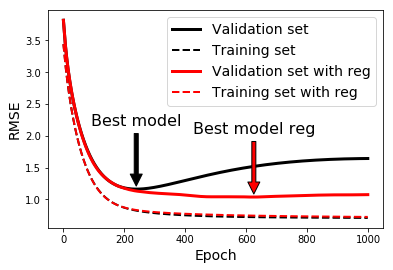

In [18]:
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.annotate('Best model reg',
             xy=(best_epoch_reg, best_val_rmse_reg),
             xytext=(best_epoch_reg, best_val_rmse_reg + 1),
             ha="center",
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=16,
            )
plt.plot(np.sqrt(val_errors), "k-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "k--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_reg), "r-", linewidth=3, label="Validation set with reg")
plt.plot(np.sqrt(train_errors_reg), "r--", linewidth=2, label="Training set with reg")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [19]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly_scaled = poly_scaler.transform(X_new)
y_new_poly_scaled = best_model.predict(X_new_poly_scaled)
y_new_poly_scaled_reg = best_model_reg.predict(X_new_poly_scaled)

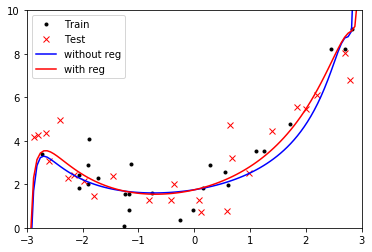

In [20]:
plot_tran_test_data()
plt.plot(X_new, y_new_poly_scaled, 'b')
plt.plot(X_new, y_new_poly_scaled_reg, 'r')
plt.axis([-3, 3, 0, 10])
plt.legend(['Train','Test','without reg','with reg'])
